<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/PadraoXFracionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#http://www.b3.com.br/data/files/C8/F3/08/B4/297BE410F816C9E492D828A8/SeriesHistoricas_Layout.pdf
import pandas as pd
import statistics

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/B3-dados/COTAHIST_A2021.TXT' , header = None)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
0,00COTAHIST.2021BOVESPA 20210420 ...
1,012021010402A1AP34 010ADVANCE AUTODRN ...
2,012021010402A1BB34 010ABB LTD DRN ...
3,012021010402A1BM34 010ABIOMED INC DRN ...
4,012021010402A1CR34 010AMCOR PLC DRN ...
...,...
503090,012021042062YDUQ3T 030YDUQS PART ON ...
503091,012021042062YDUQ3T 030YDUQS PART ON ...
503092,012021042062YDUQ3T 030YDUQS PART ON ...
503093,012021042062YDUQ3T 030YDUQS PART ON ...


In [ ]:
n=72634
data.iloc[n][0]

'012021031602TEND3       010TENDA       ON      NM   R$  000000000265500000000026550000000002536000000000258000000000025940000000002575000000000259402799000000000000512000000000001321220300000000000000009999123100000010000000000000BRTENDACNOR4110'

In [ ]:
dia = data.iloc[n][0][2:10]
dia

'20210316'

In [ ]:
papel=data.iloc[n][0][12:24]
papel

'TEND3       '

In [ ]:
open=data.iloc[n][0][56:69]
open

'0000000002655'

In [ ]:
max=data.iloc[n][0][69:82]
max


'0000000002655'

In [ ]:
min=data.iloc[n][0][82:95]
min


'0000000002536'

In [ ]:
close=data.iloc[n][0][108:121]
close

'0000000002594'

In [ ]:
papel = 'NTCO3       '

In [ ]:
dataMin1=dataMax1=[]
dataMin2=[]
dataMax2=[]
dataOpen1=[]
dataOpen2=[]
dataClose1=[]
dataClose2=[]
for n in range (0,len(data)):
  if data.iloc[n][0][12:24] == 'NTCO3F      ':
    dataMin1.append(data.iloc[n][0][82:95])
    dataMax1.append(data.iloc[n][0][69:82])
    dataOpen1.append(data.iloc[n][0][56:69])
    dataClose1.append(data.iloc[n][0][108:121])
  if data.iloc[n][0][12:24] == 'NTCO3       ':
    dataMin2.append(data.iloc[n][0][82:95])
    dataMax2.append(data.iloc[n][0][69:82])
    dataOpen2.append(data.iloc[n][0][56:69])
    dataClose2.append(data.iloc[n][0][108:121])

In [ ]:
MinF = [int(i)/100 for i in dataMin1]
MinP = [int(i)/100 for i in dataMin2]
MaxF = [int(i)/100 for i in dataMax1]
MaxP = [int(i)/100 for i in dataMax2]
OpenF = [int(i)/100 for i in dataOpen1]
OpenP = [int(i)/100 for i in dataOpen2]
CloseF = [int(i)/100 for i in dataClose1]
CloseP = [int(i)/100 for i in dataClose2]

In [ ]:
Dif = pd.DataFrame()
Dif['Min'] = [abs(x - y) for x, y in zip(MinF, MinP)]
Dif['Max'] = [abs(x - y) for x, y in zip(MaxF, MaxP)]
Dif['Open'] = [abs(x - y) for x, y in zip(OpenF, OpenP)]
Dif['Close'] = [abs(x - y) for x, y in zip(CloseF, CloseP)]

In [ ]:
Dif.describe()

,Min,Max,Open,Close
count,73.000000,73.000000,73.000000,73.000000
mean,2.309726,1.905890,0.225342,0.138082
std,1.587140,1.497579,0.202320,0.138199
min,0.000000,0.020000,0.000000,0.000000
25%,1.060000,0.870000,0.060000,0.050000
50%,2.090000,1.380000,0.180000,0.100000
75%,3.210000,2.810000,0.310000,0.190000
max,7.460000,5.640000,1.120000,0.930000


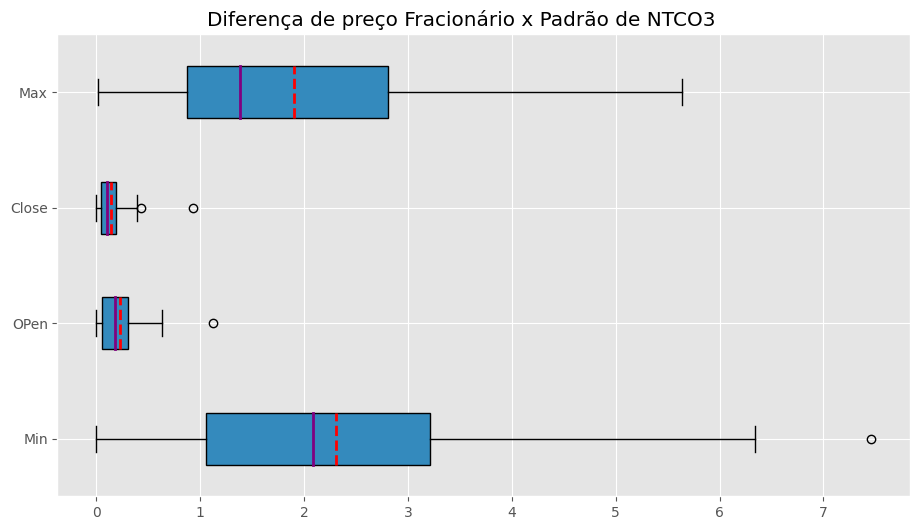

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(11, 6))
ax.boxplot((Dif['Min'], Dif['Open'] , Dif['Close'] , Dif['Max']), vert=False, showmeans=True, meanline=True,
           labels=('Min', 'OPen' , 'Close' , 'Max'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
ax.set_title('Diferença de preço Fracionário x Padrão de {}'.format(papel))
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=Dif['Min'] , name='Min' , boxmean='sd') )
fig.add_trace(go.Box(x=Dif['Open'] , name='Open', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Close'] , name ='Close', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Max'] , name='Max', boxmean='sd'))

fig.update_layout(
    title= 'boxplot com media e dp da diferença de preço Fracionário x Padrão de {}'.format(papel),
    xaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=.1,
        gridwidth=2,
    ),
)

fig.show()